This does a calibration on the Open, Fake Short and Attenuator standards
The Error correction is applied to all of the Kirkby standards, and the Real Short standard is charted.



Success
Success
Success


C:\ProgramData\Anaconda3\lib\site-packages\skrf\calibration\calibration.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  abcTmp, residualsTmp = npy.linalg.lstsq(Q,m)[0:2]


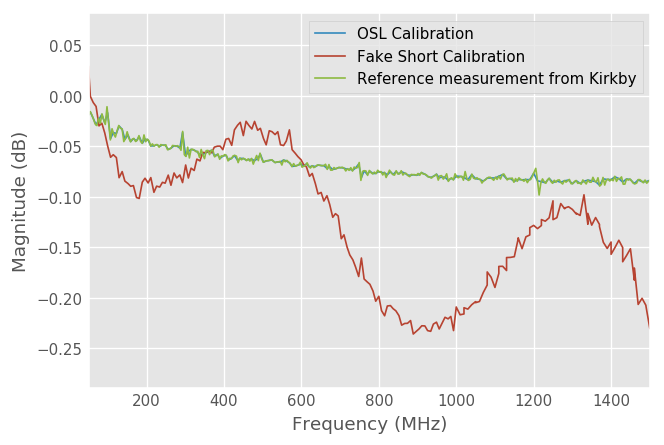

In [152]:
import skrf as rf
from skrf.calibration import OnePort
from skrf import Frequency
%matplotlib inline
from pylab import *
rf.stylely()

## Measured reference data provided with the Cal Kit
## Fake Short calculated by rotating Open by 180 degrees
idealsKirkby = rf.read_all('data/ideals/KirkbySN0092/')

## Measurements of Cal Kit on SVA
## Fake Short calculated by rotating Open by 180 degrees
measuredKirkby = rf.read_all('data/measured/SVA/KirkbySN0092/')

## Measurements of Cal Kit on SVA. Loading and error correct everything but only chart the attenuator from this set.
duts = rf.read_all('data/measured/SVA/KirkbySN0092/')

## Calibrate based on Kirkby supplied data with measured data
#cal_1 = rf.OnePort(
#    ideals = [idealsKirkby[k] for k in ['male-short-0092','male-open-0092','male-load-0092']],
#    measured = [measuredKirkby[k] for k in ['KirkbyShort','KirkbyOpen','KirkbyLoad']],
#    )

## Calibrate based on Kirkby supplied data with measured data including Faked Short measurement
cal_2 = rf.OnePort(
    ideals = [idealsKirkby[k] for k in ['fake-male-short-0092','male-open-0092','attenuator-0092-limited']],
    measured = [measuredKirkby[k] for k in ['KirkbyShortOpen180','KirkbyOpen','KirkbyAttenuator']],
    )

caled_dutsKirkby = [cal_1.apply_cal(dut) for dut in duts.values()]
caled_dutsKirkbyFakeShort = [cal_2.apply_cal(dut) for dut in duts.values()]

caled_dutsKirkby[3].plot_s_db(label='OSL Calibration') # this must be identical to the ideal graph. So it is just a check
caled_dutsKirkbyFakeShort[3].plot_s_db(label='Fake Short Calibration')
#caled_dutsKirkbyFakeShort[1].plot_s_db(label='Load Calibration')

idealsKirkby['male-short-0092']['50-1500mhz'].plot_s_db(label='Reference measurement from Kirkby')


Success
Success
Success


C:\ProgramData\Anaconda3\lib\site-packages\skrf\calibration\calibration.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  abcTmp, residualsTmp = npy.linalg.lstsq(Q,m)[0:2]


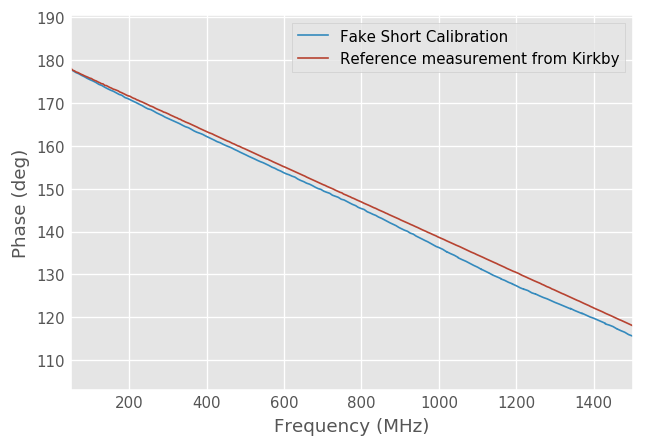

In [142]:
import skrf as rf
from skrf.calibration import OnePort
%matplotlib inline
from pylab import *
rf.stylely()

## Measured reference data provided with the Cal Kit
## Fake Short calculated by rotating Open by 180 degrees
idealsKirkby = rf.read_all('data/ideals/KirkbySN0092/')

## Measurements of Cal Kit on SVA
## Fake Short calculated by rotating Open by 180 degrees
measuredKirkby = rf.read_all('data/measured/SVA/KirkbySN0092/')

## Measurements of Cal Kit on SVA. Loading and error correct everything but only chart the attenuator from this set.
duts = rf.read_all('data/measured/SVA/KirkbySN0092/')

## Calibrate based on Kirkby supplied data with measured data
#cal_1 = rf.OnePort(
#    ideals = [idealsKirkby[k] for k in ['male-short-0092','male-open-0092','male-load-0092']],
#    measured = [measuredKirkby[k] for k in ['KirkbyShort','KirkbyOpen','KirkbyLoad']],
#    )

## Calibrate based on Kirkby supplied data with measured data including Faked Short measurement
cal_2 = rf.OnePort(
    ideals = [idealsKirkby[k] for k in ['fake-male-short-0092','male-open-0092','male-load-0092']],
    measured = [measuredKirkby[k] for k in ['KirkbyShortOpen180','KirkbyOpen','KirkbyLoad']],
    )

#caled_dutsKirkby = [cal_1.apply_cal(dut) for dut in duts.values()]
caled_dutsKirkbyFakeShort = [cal_2.apply_cal(dut) for dut in duts.values()]

#caled_dutsKirkby[3].plot_s_deg(label='OSL Calibration')
caled_dutsKirkbyFakeShort[3].plot_s_deg(label='Fake Short Calibration')

idealsKirkby['male-short-0092']['50-1500mhz'].plot_s_deg(label='Reference measurement from Kirkby')
